In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('7.10_clustering_hw.csv')

data_pic = data[['x1','x2']]
data_pic.head()
data_label = data.y

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

Используя метод SKlearn


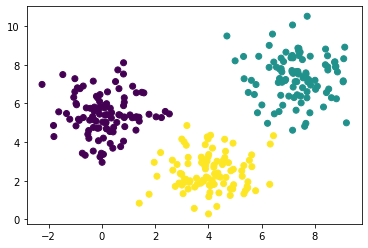

ИСходная класстеризация


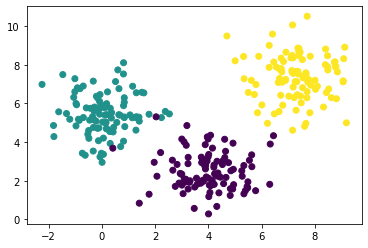

In [6]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=42)
model.fit(data_pic)
print(f'Используя метод SKlearn')
plt.scatter(data_pic['x1'], data_pic['x2'], marker='o', c = model.labels_)
plt.show()
print(f'ИСходная класстеризация')
plt.scatter(data_pic['x1'], data_pic['x2'], marker='o', c = data_label)
plt.show()

In [7]:
from sklearn.metrics import silhouette_score

siluett_score_1 = silhouette_score(data_pic, data_label)
siluett_score_2 = silhouette_score(data_pic, model.labels_)
print(f'Изначальное качество класстеризации по метрике силует {round(siluett_score_1,5)}')
print(f'Качество класстеризации по метрике силует после обучения {round(siluett_score_2,5)}')

Изначальное качество класстеризации по метрике силует 0.64264
Качество класстеризации по метрике силует после обучения 0.65127


Центры класстеров

In [8]:
centers = model.cluster_centers_
centers

array([[0.11472588, 5.38816844],
       [7.32891777, 7.36774138],
       [4.04379735, 2.45403144]])

Добавление класстеров на график

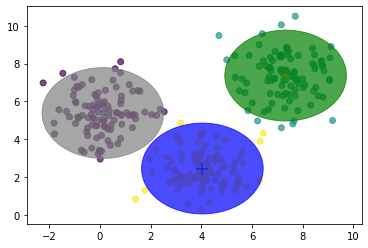

In [9]:
plt.scatter(data_pic['x1'], data_pic['x2'], marker='o', c = model.labels_, alpha=0.7)
plt.scatter(centers[0][0], centers[0][1], marker='+', s=140)
circle1 = plt.Circle((centers[0][0], centers[0][1]), 2.4, color='grey', alpha=.7)
plt.scatter(centers[1][0], centers[1][1], marker='+', s=140)
circle2 = plt.Circle((centers[1][0], centers[1][1]), 2.4, color='g', alpha=.7)
plt.scatter(centers[2][0], centers[2][1], marker='+', s=140)
circle3 = plt.Circle((centers[2][0], centers[2][1]), 2.4, color='b', alpha=.7)

plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.gca().add_patch(circle3)
plt.show()

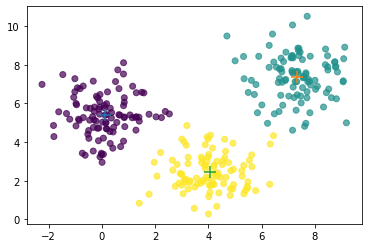

In [10]:
plt.scatter(data_pic['x1'], data_pic['x2'], marker='o', c = model.labels_, alpha=0.7)
plt.scatter(centers[0][0], centers[0][1], marker='+', s=140)
plt.scatter(centers[1][0], centers[1][1], marker='+', s=140)
plt.scatter(centers[2][0], centers[2][1], marker='+', s=140)

plt.show()

Нахождение центов

In [11]:
center_1 = centers[0]
center_2 = centers[1]
center_3 = centers[2]

Произвольные точки

In [14]:
x = np.array([0,0.5])

In [15]:
y = np.array([5,8])

In [16]:
import math

Нахождение расстояния от центров до точек

In [17]:
def find_distance(x, y):
    return print(math.sqrt(pow((x[0] - y[0]),2) + pow((x[1] - y[1]),2)))

In [18]:
find_distance(x, center_1)
find_distance(x, center_2)
find_distance(x, center_3)

4.889514572083671
10.043849233446752
4.4911619798037306


In [19]:
find_distance(y, center_1)
find_distance(y, center_2)
find_distance(y, center_3)

5.539636027159489
2.413215477647149
5.627796257491636


Нахождение AIM

In [20]:
from sklearn.metrics.cluster import adjusted_mutual_info_score

In [21]:
adjusted_mutual_info_score(data_label, model.labels_, average_method='arithmetic')

0.9700074953683859

In [23]:
from sklearn.cluster import DBSCAN

scan = DBSCAN(eps=0.6, min_samples = 10).fit(data_pic)
labels_scan = scan.labels_

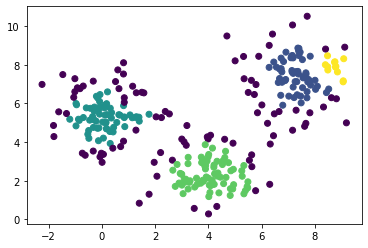

In [28]:
plt.scatter(data_pic['x1'], data_pic['x2'], c=labels_scan, marker='o')